In [68]:
import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

**We are using here PassiveAggressiveClassifier for prediction**

In [69]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [70]:
df=pd.read_csv('/content/fake_or_real_news.csv')

In [71]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [72]:
df.shape

(6335, 4)

Total information about the dataset

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


Checking null values

In [74]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

Checking duplicates

In [75]:
df.duplicated().sum()

0

Dropping unneccesary column

In [76]:
df.drop('Unnamed: 0', axis=1, inplace=True)

This is our final dataset.

In [77]:
df.head(1)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE


**The labeled column is distributed properly.**

In [78]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

Converting the labeled column into numerical column

In [79]:
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

Showing the distribution of data

<ipython-input-80-59c8b08e7924>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x=df['label'])


<Axes: ylabel='Density'>

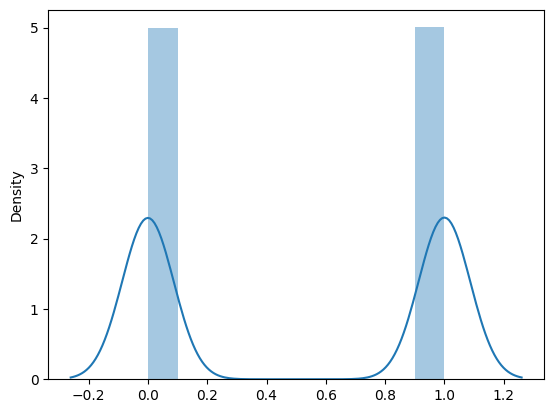

In [80]:
sn.distplot(x=df['label'])

## Train Test Split

In [81]:
X=df['text']
Y=df['label']

In [102]:
print(X)

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object


In [103]:
print(Y)

0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6335, dtype: int64


In [104]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [105]:
print(X.shape, X_train.shape, X_test.shape)

(6335,) (5068,) (1267,)


### Convert the texts into the nemerical matrix using Countidvectorizer or TfidfVectorizer

In [106]:
tfidf = TfidfVectorizer()

X_train=tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

In [107]:
X_train

<5068x61884 sparse matrix of type '<class 'numpy.float64'>'
	with 1738712 stored elements in Compressed Sparse Row format>

**CountidVectorizer giving us a bit low accuracy so recommended to use tfIDfvectorizer**

### Using Logistic Regression

In [108]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

**Accuracies and Metrices**

In [109]:
y_pred=lr.predict(X_train)
train_acc=accuracy_score(Y_train, y_pred)

print('Training accuracy is: ', train_acc)

Training accuracy is:  0.9510655090765588


In [110]:
y1_pred=lr.predict(X_test)
test_acc=accuracy_score(Y_test, y1_pred)

print('Testing accuracy is: ', test_acc)

Testing accuracy is:  0.904498816101026


### Using Naive Bayes

**Accuracies and Metrices**

In [111]:
nv=MultinomialNB()
nv.fit(X_train, Y_train)

MultinomialNB()

In [112]:
z_pred=nv.predict(X_train)
trainn_acc=accuracy_score(Y_train, z_pred)

print('Training accuracy is: ', trainn_acc)

Training accuracy is:  0.8506314127861089


In [113]:
z1_pred=nv.predict(X_test)
testt_acc=accuracy_score(Y_test, z1_pred)

print('Testing accuracy is: ', testt_acc)

Testing accuracy is:  0.7853196527229677


## Using SVM

**Accuracies and Metrices**

In [92]:
vm=SVC()
vm.fit(X_train,Y_train)

SVC()

In [93]:
x_pred=vm.predict(X_train)
trainnn_acc=accuracy_score(Y_train, x_pred)

print('Training accuracy is: ', trainnn_acc)

Training accuracy is:  0.9954617205998422


In [94]:
x1_pred=vm.predict(X_test)
testtt_acc=accuracy_score(Y_test, x1_pred)

print('Testing accuracy is: ', testtt_acc)

Testing accuracy is:  0.9313338595106551


## Using Passive classifier

In [114]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train, Y_train)

PassiveAggressiveClassifier(max_iter=50)

In [115]:
a_pred=pac.predict(X_train)
trainnnn_acc=accuracy_score(Y_train, a_pred)

print('Training accuracy is: ', trainnnn_acc)

Training accuracy is:  1.0


In [116]:
a1_pred=pac.predict(X_test)
testttt_acc=accuracy_score(Y_test, a1_pred)

print('Testing accuracy is: ', testttt_acc)

Testing accuracy is:  0.9471191791633781


Confuison matrix

In [117]:
a1_pred=pac.predict(X_test)
testttt_acc=confusion_matrix(Y_test, a1_pred)

print(testttt_acc)

[[626  38]
 [ 29 574]]


<Axes: >

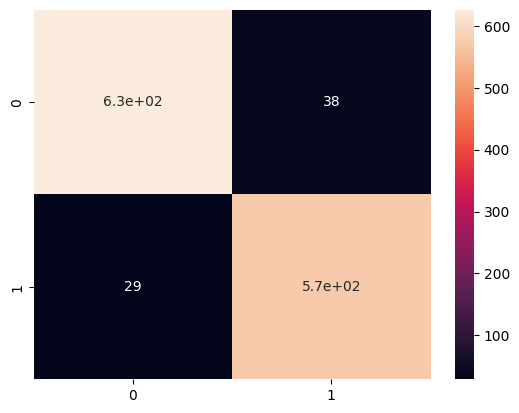

In [125]:
sn.heatmap(testttt_acc, annot=True)

**So we are using here MultinomialNB.**

### Prediction

Test case 1

In [121]:
input_text ='''Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam.
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI.
The word â€œunprecedentedâ€ has been thrown around so often this election that it ought to be retired. But itâ€™s still unprecedented for the nominee of a major political party to go war with the FBI.
But thatâ€™s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillaryâ€™s opponent in this election.
The FBI is under attack by everyone from Obama to CNN. Hillaryâ€™s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldnâ€™t be too surprising if the Clintons or their allies were to start running attack ads against the FBI.'''


print(input_text)
input = tfidf.transform([input_text])

print('')

print('The Mail type is: ')
print(le.inverse_transform(nv.predict(input)))

Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word â€œunprecedentedâ€ has been thrown around so often this election that it ought to be retired. But itâ€™s still unprecedented for the nominee of a major political party to go war with the FBI. 
But thatâ€™s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillaryâ€™s opponent in this election. 
The FBI is under attack by everyone from Obama to CNN. Hillaryâ€™s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldnâ€™t be too surprising if the Clintons or their allies were to start running attack ads against the FBI.

The Mail type is: 
['FAKE']


Test case 2

In [123]:
input_text='''U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.
Kerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Hollande, then return to Washington.
The visit by Kerry, who has family and childhood ties to the country and speaks fluent French, could address some of the criticism that the United States snubbed France in its darkest hour in many years.
The French press on Monday was filled with questions about why neither President Obama nor Kerry attended Sundayâ€™s march, as about 40 leaders of other nations did. Obama was said to have stayed away because his own security needs can be taxing on a country, and Kerry had prior commitments.
Among roughly 40 leaders who did attend was Israeli Prime Minister Benjamin Netanyahu, no stranger to intense security, who marched beside Hollande through the city streets. The highest ranking U.S. officials attending the march were Jane Hartley, the ambassador to France, and Victoria Nuland, the assistant secretary of state for European affairs. Attorney General Eric H. Holder Jr. was in Paris for meetings with law enforcement officials but did not participate in the march.
Kerry spent Sunday at a business summit hosted by Indiaâ€™s prime minister, Narendra Modi. The United States is eager for India to relax stringent laws that function as barriers to foreign investment and hopes Modiâ€™s government will act to open the huge Indian market for more American businesses.
In a news conference, Kerry brushed aside criticism that the United States had not sent a more senior official to Paris as â€œquibbling a little bit.â€ He noted that many staffers of the American Embassy in Paris attended the march, including the ambassador. He said he had wanted to be present at the march himself but could not because of his prior commitments in India.
â€œBut that is why I am going there on the way home, to make it crystal clear how passionately we feel about the events that have taken place there,â€ he said.
â€œAnd I donâ€™t think the people of France have any doubts about Americaâ€™s understanding of what happened, of our personal sense of loss and our deep commitment to the people of France in this moment of trauma.â€'''


print(input_text)
print('')


vector=tfidf.transform([input_text])
print('The Mail type is: ')
print(le.inverse_transform(nv.predict(vector)))

U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.
Kerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Hollande, then return to Washington.
The visit by Kerry, who has family and childhood ties to the country and speaks fluent French, could address some of the criticism that the United States snubbed France in its darkest hour in many years.
The French press on Monday was filled with questions about why neither President Obama nor Kerry attended Sundayâ€™s march, as about 40 leaders of other nations did. Obama was said to have stayed away because his own security needs can be taxing on a country, and Ke